In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)


data = pd.read_csv(r"C:\Users\HP\Documents\BDA_Mini_Project\Train\Chicago_Crimes_2012_to_2017.csv",error_bad_lines=False)
data.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [2]:
data.head()

Unnamed: 0        ID Case Number                    Date  \
0           3  10508693    HZ250496  05/03/2016 11:40:00 PM   
1          89  10508695    HZ250409  05/03/2016 09:40:00 PM   
2         197  10508697    HZ250503  05/03/2016 11:31:00 PM   
3         673  10508698    HZ250424  05/03/2016 10:10:00 PM   
4         911  10508699    HZ250455  05/03/2016 10:00:00 PM   

                 Block  IUCR            Primary Type              Description  \
0   013XX S SAWYER AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
1   061XX S DREXEL AVE  0486                 BATTERY  DOMESTIC BATTERY SIMPLE   
2  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT   
3    049XX W FULTON ST  0460                 BATTERY                   SIMPLE   
4    003XX N LOTUS AVE  0820                   THEFT           $500 AND UNDER   

  Location Description  Arrest  ...  Ward  Community Area  FBI Code  \
0            APARTMENT    True  ...  24.0            29.0       08B   
1            RESIDENCE   False  ...  20.0            42.0       08B   
2               STREET   False  ...  37.0            25.0        24   
3             SIDEWALK   False  ...  28.0            25.0       08B   
4            RESIDENCE   False  ...  28.0            25.0        06   

   X Coordinate  Y Coordinate  Year              Updated On   Latitude  \
0     1154907.0     1893681.0  2016  05/10/2016 03:56:50 PM  41.864073   
1     1183066.0     1864330.0  2016  05/10/2016 03:56:50 PM  41.782922   
2     1140789.0     1904819.0  2016  05/10/2016 03:56:50 PM  41.894908   
3     1143223.0     1901475.0  2016  05/10/2016 03:56:50 PM  41.885687   
4     1139890.0     1901675.0  2016  05/10/2016 03:56:50 PM  41.886297   

   Longitude                       Location  
0 -87.706819  (41.864073157, -87.706818608)  
1 -87.604363   (41.782921527, -87.60436317)  
2 -87.758372  (41.894908283, -87.758371958)  
3 -87.749516  (41.885686845, -87.749515983)  
4 -87.761751  (41.886297242, -87.761750709)  

[5 rows x 23 columns]

In [3]:
data.isna().sum()

Unnamed: 0                  0
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
Beat                        0
District                    1
Ward                       14
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

In [2]:
data.Date = pd.to_datetime(data.Date, format="%m/%d/%Y %I:%M:%S %p")
# data.set_index("Date", inplace=True)

In [5]:
data.head()

Unnamed: 0        ID Case Number                Date                Block  \
0           3  10508693    HZ250496 2016-05-03 23:40:00   013XX S SAWYER AVE   
1          89  10508695    HZ250409 2016-05-03 21:40:00   061XX S DREXEL AVE   
2         197  10508697    HZ250503 2016-05-03 23:31:00  053XX W CHICAGO AVE   
3         673  10508698    HZ250424 2016-05-03 22:10:00    049XX W FULTON ST   
4         911  10508699    HZ250455 2016-05-03 22:00:00    003XX N LOTUS AVE   

   IUCR            Primary Type              Description Location Description  \
0  0486                 BATTERY  DOMESTIC BATTERY SIMPLE            APARTMENT   
1  0486                 BATTERY  DOMESTIC BATTERY SIMPLE            RESIDENCE   
2  0470  PUBLIC PEACE VIOLATION         RECKLESS CONDUCT               STREET   
3  0460                 BATTERY                   SIMPLE             SIDEWALK   
4  0820                   THEFT           $500 AND UNDER            RESIDENCE   

   Arrest  ...  Ward  Community Area  FBI Code  X Coordinate  Y Coordinate  \
0    True  ...  24.0            29.0       08B     1154907.0     1893681.0   
1   False  ...  20.0            42.0       08B     1183066.0     1864330.0   
2   False  ...  37.0            25.0        24     1140789.0     1904819.0   
3   False  ...  28.0            25.0       08B     1143223.0     1901475.0   
4   False  ...  28.0            25.0        06     1139890.0     1901675.0   

   Year              Updated On   Latitude  Longitude  \
0  2016  05/10/2016 03:56:50 PM  41.864073 -87.706819   
1  2016  05/10/2016 03:56:50 PM  41.782922 -87.604363   
2  2016  05/10/2016 03:56:50 PM  41.894908 -87.758372   
3  2016  05/10/2016 03:56:50 PM  41.885687 -87.749516   
4  2016  05/10/2016 03:56:50 PM  41.886297 -87.761751   

                        Location  
0  (41.864073157, -87.706818608)  
1   (41.782921527, -87.60436317)  
2  (41.894908283, -87.758371958)  
3  (41.885686845, -87.749515983)  
4  (41.886297242, -87.761750709)  

[5 rows x 23 columns]

In [6]:
np.count_nonzero(data.isnull())

187129

In [3]:
data.dropna(how='any', axis=0, inplace=True) 

In [4]:
np.count_nonzero(data.isnull())

0

In [5]:
data.drop(['Location'], axis=1, inplace=True)

In [6]:
data['Latitude'] = data['Latitude'].astype(float)
data['Longitude'] = data['Longitude'].astype(float)

In [7]:
#Exploring Latitude and Longitude
#we'll remove all rows outside of this range

print('Current rows:', data.shape[0])
data = data[(((data.Latitude >= 41.64) & (data.Longitude <= -87.50)) | 
            ((data.Latitude <= 41.94) & (data.Longitude >= -87.94)))]
print('Rows after removing out of box points:', data.shape[0])

Current rows: 1418365
Rows after removing out of box points: 1418291


In [12]:
#X-coord and Y-coord
data['X Coordinate'].describe()

count    1.418291e+06
mean     1.164460e+06
std      1.640371e+04
min      1.092706e+06
25%      1.152541e+06
50%      1.166016e+06
75%      1.176363e+06
max      1.205119e+06
Name: X Coordinate, dtype: float64

In [13]:
data['Y Coordinate'].describe()

count    1.418291e+06
mean     1.885608e+06
std      3.130588e+04
min      1.813894e+06
25%      1.858755e+06
50%      1.891485e+06
75%      1.908687e+06
max      1.951573e+06
Name: Y Coordinate, dtype: float64

In [8]:
print('Current rows:', data.shape[0])
data[['X Coordinate', 'Y Coordinate']] = data[['X Coordinate', 'Y Coordinate']].replace(0.0, np.nan)
data.dropna(inplace=True)
print('Rows after removing errorneous coords:', data.shape[0])

Current rows: 1418291
Rows after removing errorneous coords: 1418291


In [9]:
data.drop(['Updated On'], axis=1, inplace=True)

In [10]:
#creating datetime index
data.index = pd.DatetimeIndex(data.Date)

In [11]:
#removing rows with mismatch in year
print('Current rows:', data.shape[0])
data = data[data.index.year == data.Year]
print('Rows after removing mismatch:', data.shape[0])

Current rows: 1418291
Rows after removing mismatch: 1418291


In [13]:
import math

In [14]:
#we'll create some new columns like month, dayOfWeek, dayOfMonth, weekOfMonth(wom)
data['Month'] = data.index.month
data['dayOfWeek'] = data.index.dayofweek
data['dayOfMonth'] = data.index.day
data['dayOfYear'] = data.index.dayofyear
data['weekOfMonth'] = data.dayOfMonth.apply(lambda d: (d - 1) // 7 + 1)

dayOfYear = list(data.index.dayofyear)

weekOfYear = [math.ceil(i/7) for i in dayOfYear]
data['weekOfYear'] = weekOfYear

In [15]:
#de-duplication of data
print('Current rows:', data.shape[0])
data.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)
print('Rows after deduplication:', data.shape[0])

Current rows: 1418291
Rows after deduplication: 1418291


## EDA

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

### Day of Week

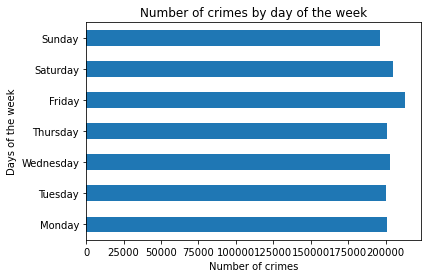

In [22]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data.groupby([data.dayOfWeek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

In [23]:
data.dayOfWeek.value_counts(normalize=True)

4    0.149997
5    0.144261
2    0.143128
3    0.141520
0    0.141365
1    0.141298
6    0.138431
Name: dayOfWeek, dtype: float64

Most crimes happen on a Friday, but there is no considerable difference between the number of crimes happening on a particular day.

### Month

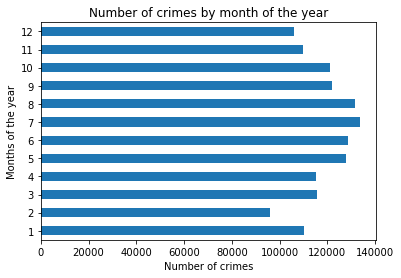

In [24]:
data.groupby([data.Month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

In [25]:
data.Month.value_counts(normalize=True)

7     0.094221
8     0.092807
6     0.090702
5     0.090220
9     0.086066
10    0.085559
3     0.081559
4     0.081359
1     0.077713
11    0.077332
12    0.074764
2     0.067698
Name: Month, dtype: float64

1. Again there is no considerable difference between the crimes happening in a particular month 
2. <b>February has lowest number of crimes occured </b>
3. One reason of this can be less number of days in month of February

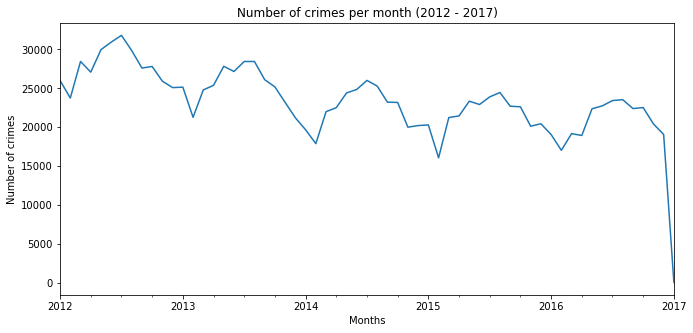

In [26]:
plt.figure(figsize=(11,5))
data.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2012 - 2017)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

### Day of Month

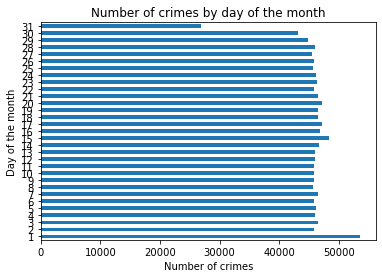

In [27]:
data.groupby([data.dayOfMonth]).size().plot(kind='barh')
plt.ylabel('Day of the month')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the month')
plt.show()

In [28]:
data.dayOfMonth.value_counts(normalize=True)

1     0.037755
15    0.034109
20    0.033327
17    0.033310
16    0.033049
14    0.032952
18    0.032840
21    0.032822
7     0.032794
19    0.032766
3     0.032760
23    0.032737
24    0.032539
5     0.032512
4     0.032502
12    0.032467
13    0.032452
28    0.032437
22    0.032387
2     0.032381
10    0.032313
9     0.032311
26    0.032306
6     0.032304
11    0.032285
8     0.032265
25    0.032201
27    0.032091
29    0.031662
30    0.030389
31    0.018976
Name: dayOfMonth, dtype: float64

1. Again, day of the month does not show any considerable variations
2. Acc. to the graph we can see that 1st day of the month records highest crime, but when looking at the percentages, it's not a lot of difference
3. Last day of the month records minimum crime

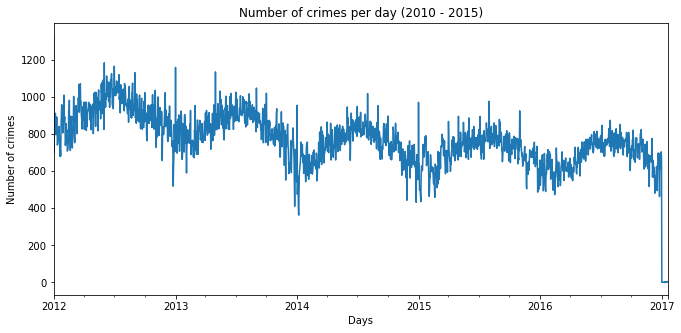

In [29]:
plt.figure(figsize=(11,5))
data.resample('D').size().plot(legend=False)
plt.title('Number of crimes per day (2010 - 2015)')
plt.xlabel('Days')
plt.ylabel('Number of crimes')
plt.show()

We can see a similar trend each year when considering crimes per day. 
First crime rates start to increase, than decrease 
Overall trend is again downwards

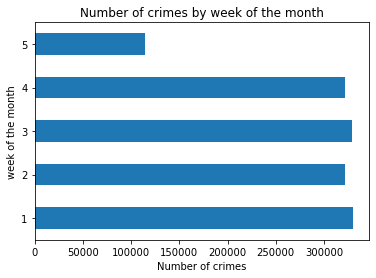

In [30]:
data.groupby([data.weekOfMonth]).size().plot(kind='barh')
plt.ylabel('week of the month')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by week of the month')
plt.show()

In [31]:
data.weekOfMonth.value_counts(normalize=True)

1    0.233009
3    0.232222
2    0.227045
4    0.226697
5    0.081027
Name: weekOfMonth, dtype: float64

Last week of the month has considerable low crime rates

### Week of year

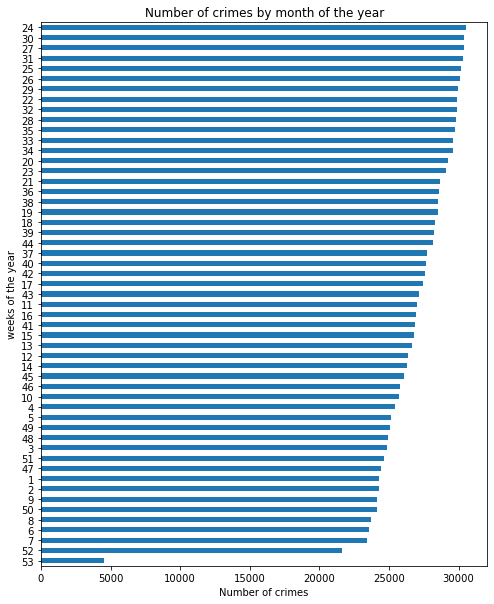

In [32]:
plt.figure(figsize=(8,10))
data.groupby([data.weekOfYear]).size().sort_values().plot(kind='barh')
plt.ylabel('weeks of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

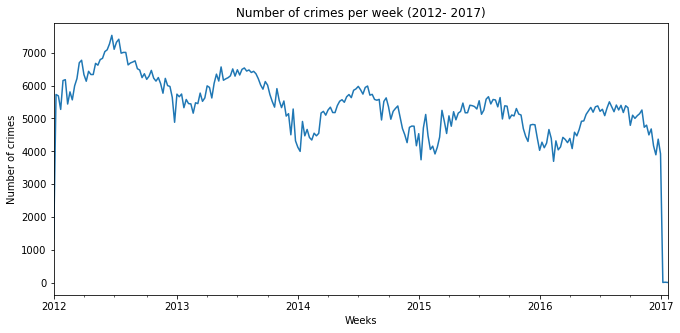

In [33]:
plt.figure(figsize=(11,5))
data.resample('W').size().plot(legend=False)
plt.title('Number of crimes per week (2012- 2017)')
plt.xlabel('Weeks')
plt.ylabel('Number of crimes')
plt.show()

With the exception of week 53(bcoz it has fewest datapoints), crime is lower is end of year

### Week of Year per district

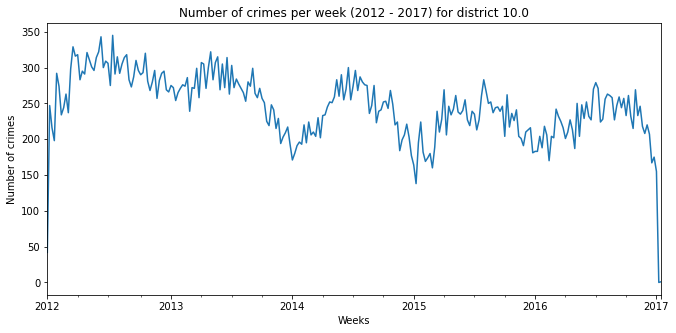

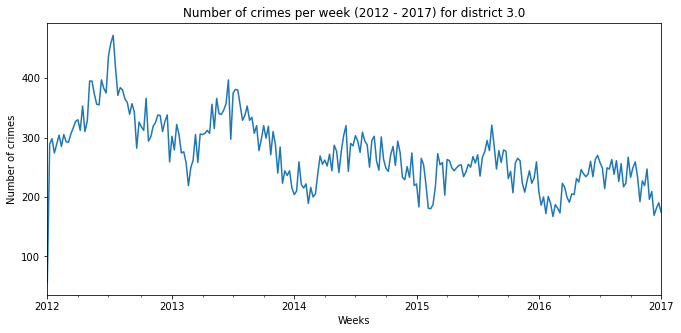

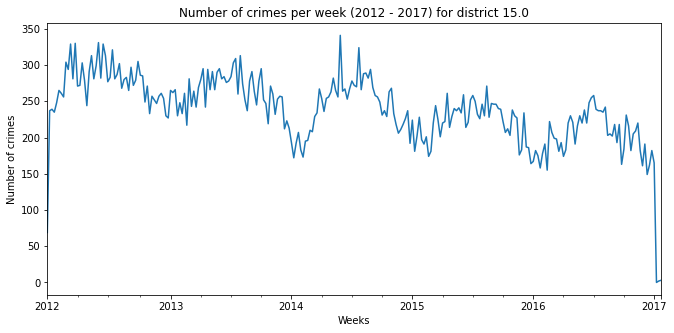

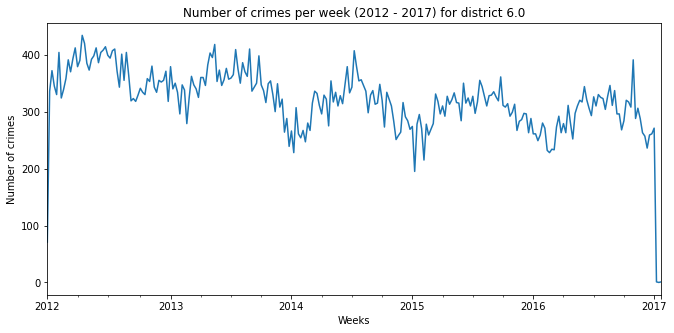

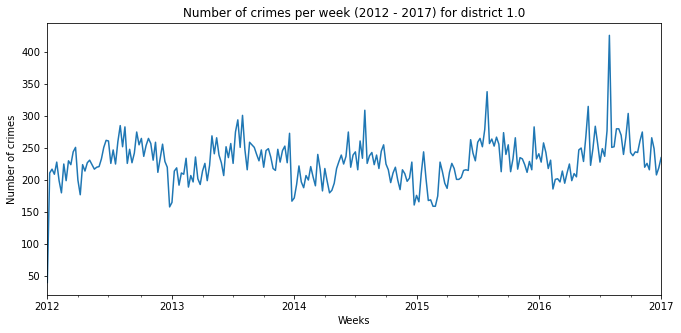

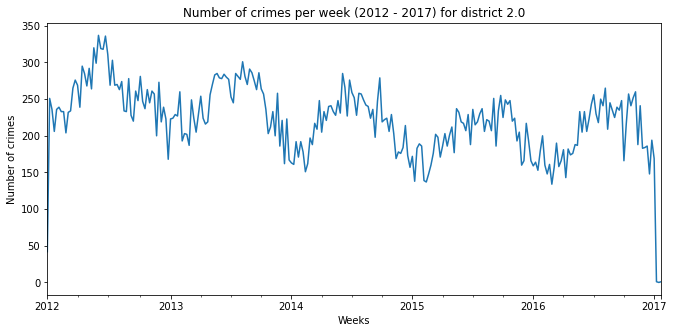

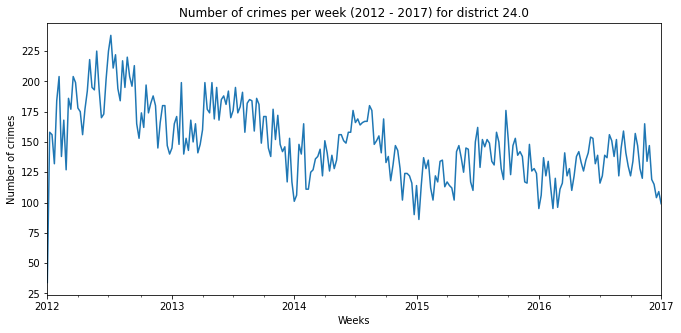

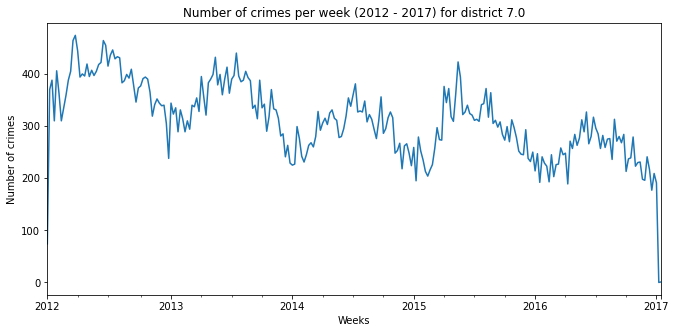

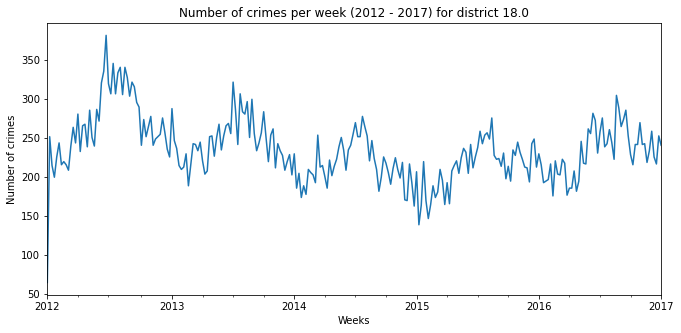

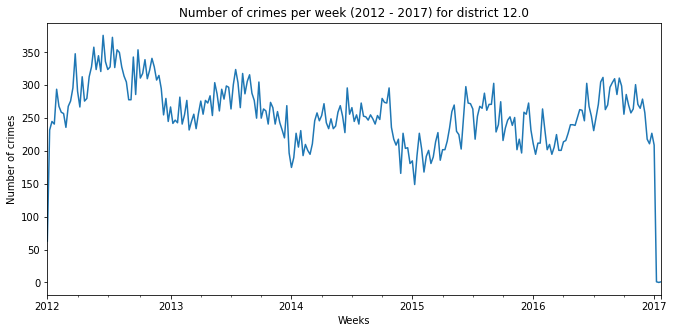

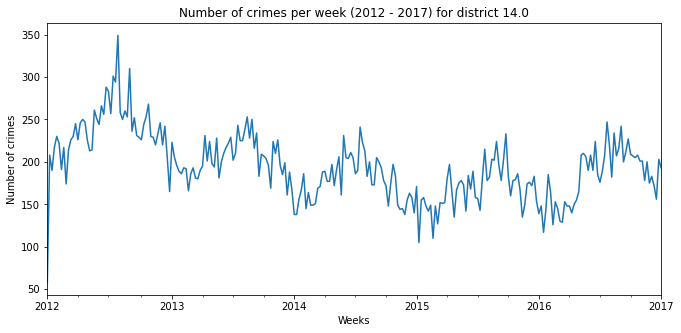

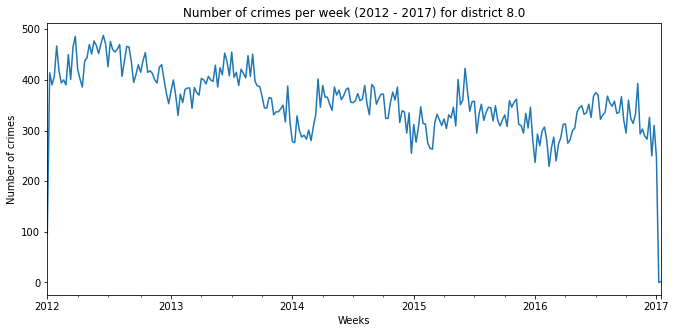

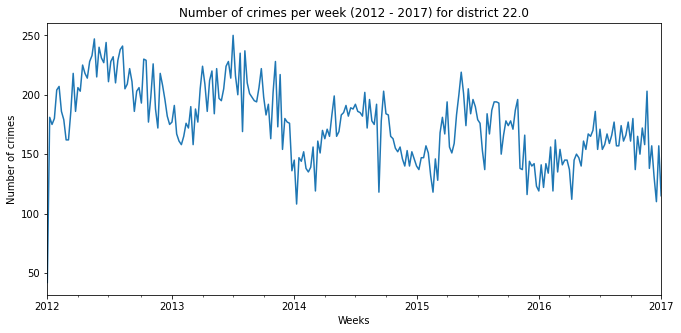

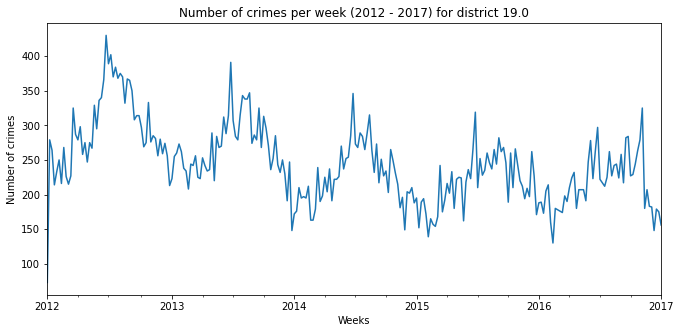

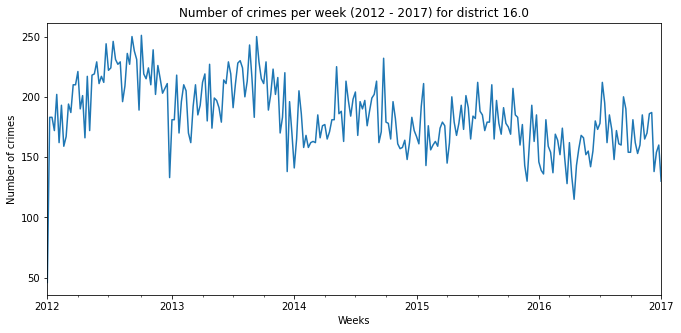

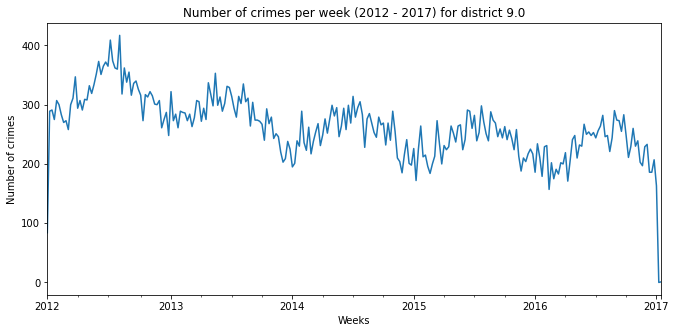

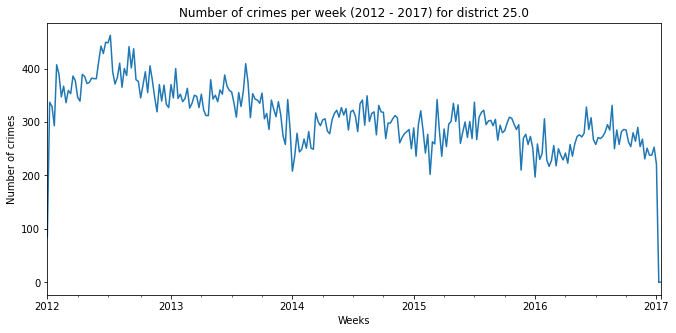

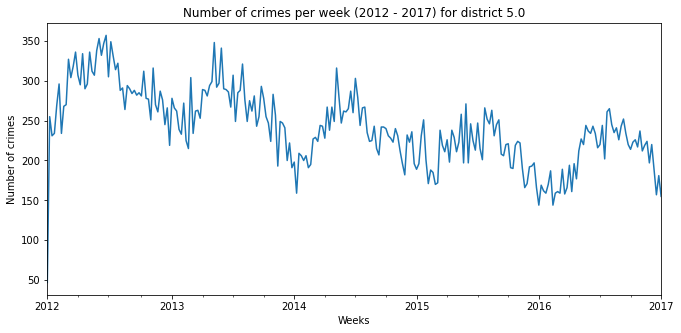

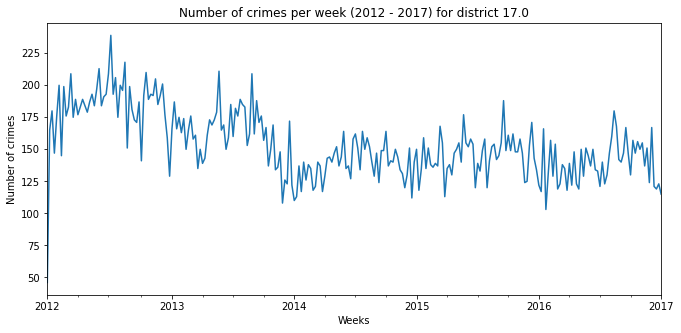

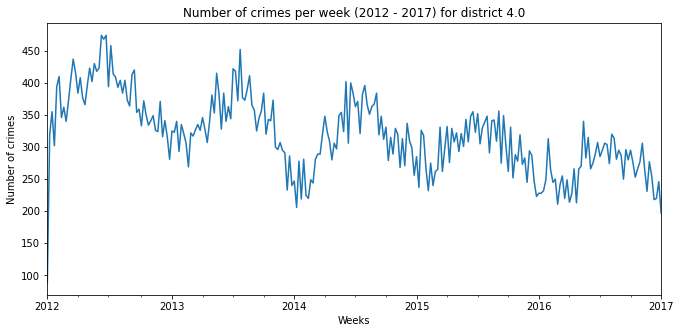

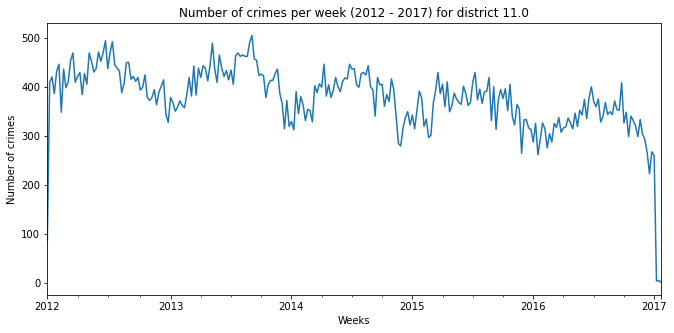

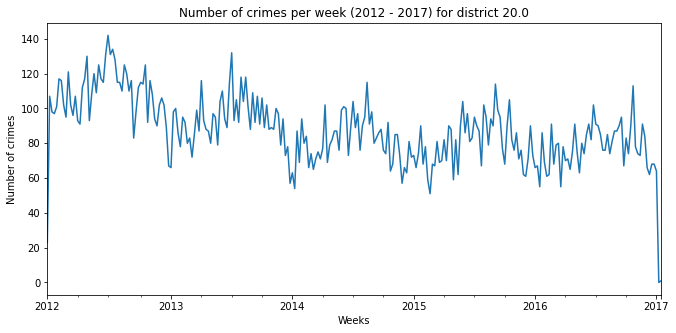

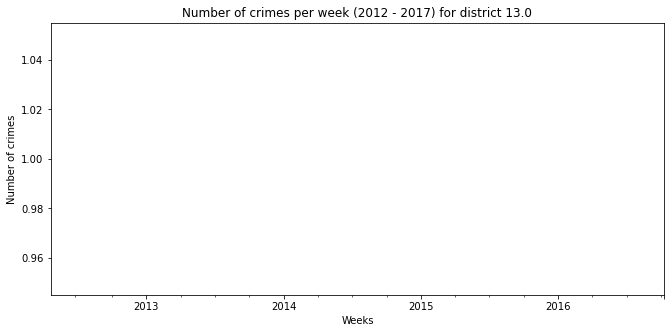

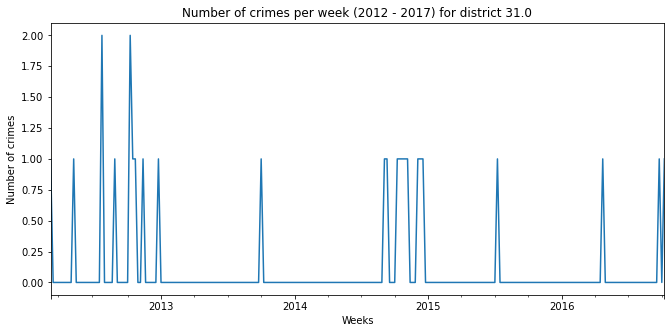

In [34]:
listOfDistricts = list(data['District'].unique())

for district in listOfDistricts:
    df = data[data['District'] == district]
    plt.figure(figsize=(11,5))
    df.resample('W').size().plot(legend=False)
    plt.title('Number of crimes per week (2012 - 2017) for district {}'.format(district))
    plt.xlabel('Weeks')
    plt.ylabel('Number of crimes')
    plt.show()

### Primary Types

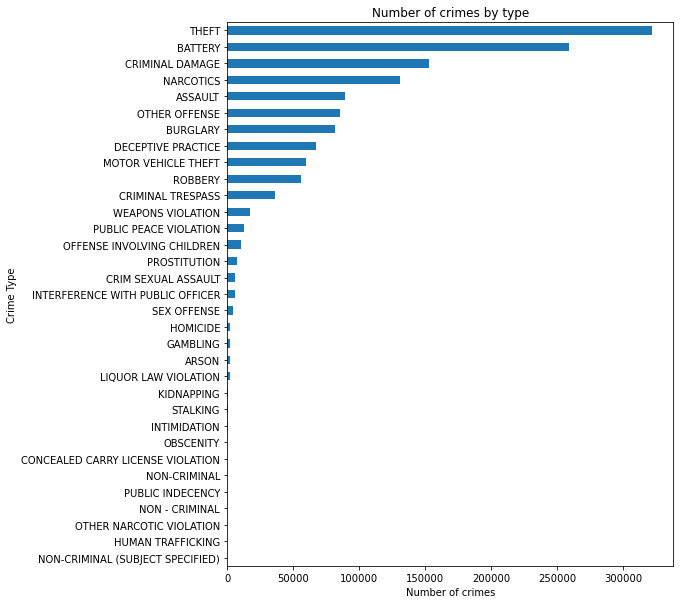

In [35]:
plt.figure(figsize=(8,10))
data.groupby([data['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [36]:
data['Primary Type'].value_counts(normalize=True)

THEFT                                0.226991
BATTERY                              0.182561
CRIMINAL DAMAGE                      0.107740
NARCOTICS                            0.092484
ASSAULT                              0.063106
OTHER OFFENSE                        0.060182
BURGLARY                             0.057581
DECEPTIVE PRACTICE                   0.047667
MOTOR VEHICLE THEFT                  0.042199
ROBBERY                              0.039547
CRIMINAL TRESPASS                    0.025682
WEAPONS VIOLATION                    0.011974
PUBLIC PEACE VIOLATION               0.009175
OFFENSE INVOLVING CHILDREN           0.007466
PROSTITUTION                         0.005335
CRIM SEXUAL ASSAULT                  0.004441
INTERFERENCE WITH PUBLIC OFFICER     0.004326
SEX OFFENSE                          0.003166
HOMICIDE                             0.001826
GAMBLING                             0.001559
ARSON                                0.001534
LIQUOR LAW VIOLATION              

- There are 33 different types of Primary types of Crime
- Primary type is Level 1 category of the crime
- seeing from the graph and counts we can see that few categories like OBSCENITY and below have very less crime numbers and can be removed from the data (deemed as outliers)

In [37]:
print('Current rows:', data.shape[0])
data['Primary Type'] = data['Primary Type'].astype(str)
data = data[(data['Primary Type'] != 'OBSCENITY') & 
            (data['Primary Type'] != 'PUBLIC INDECENCY') & 
            (data['Primary Type'] != 'CONCEALED CARRY LICENSE VIOLATION') & 
            (data['Primary Type'] != 'NON-CRIMINAL') & 
            (data['Primary Type'] != 'OTHER NARCOTIC VIOLATION') & 
            (data['Primary Type'] != 'NON - CRIMINAL') & 
            (data['Primary Type'] != 'HUMAN TRAFFICKING') & 
            (data['Primary Type'] != 'NON-CRIMINAL (SUBJECT SPECIFIED)')]

print('Rows after removing primary type outliers:', data.shape[0])

Current rows: 1418291
Rows after removing primary type outliers: 1417805


### Location Descrption

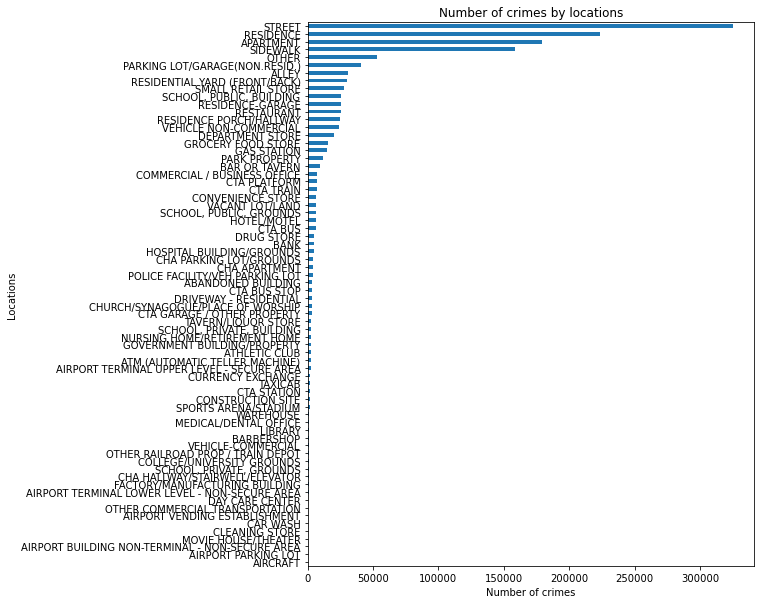

In [38]:
plt.figure(figsize=(8,10))
data.groupby([data['Location Description']]).size().sort_values(ascending=True)[-70:].plot(kind='barh')
plt.title('Number of crimes by locations')
plt.ylabel('Locations')
plt.xlabel('Number of crimes')
plt.show()

Considering crime in only top 50 locations

In [39]:
top50Locations = list(data.groupby([data['Location Description']]).size().sort_values(ascending=True)[-50:].index)

In [40]:
print('Current rows:', data.shape[0])
data = data[data['Location Description'].isin(top50Locations)]
print('Rows after removing location outliers:', data.shape[0])

Current rows: 1417805
Rows after removing location outliers: 1394275


In [41]:
data['Location Description'].value_counts()

STREET                                        324998
RESIDENCE                                     223753
APARTMENT                                     179385
SIDEWALK                                      158436
OTHER                                          53441
PARKING LOT/GARAGE(NON.RESID.)                 40892
ALLEY                                          31226
RESIDENTIAL YARD (FRONT/BACK)                  30205
SMALL RETAIL STORE                             28205
SCHOOL, PUBLIC, BUILDING                       25448
RESIDENCE-GARAGE                               25255
RESTAURANT                                     25190
RESIDENCE PORCH/HALLWAY                        24993
VEHICLE NON-COMMERCIAL                         23989
DEPARTMENT STORE                               20358
GROCERY FOOD STORE                             15741
GAS STATION                                    15018
PARK PROPERTY                                  12098
BAR OR TAVERN                                 

### Description

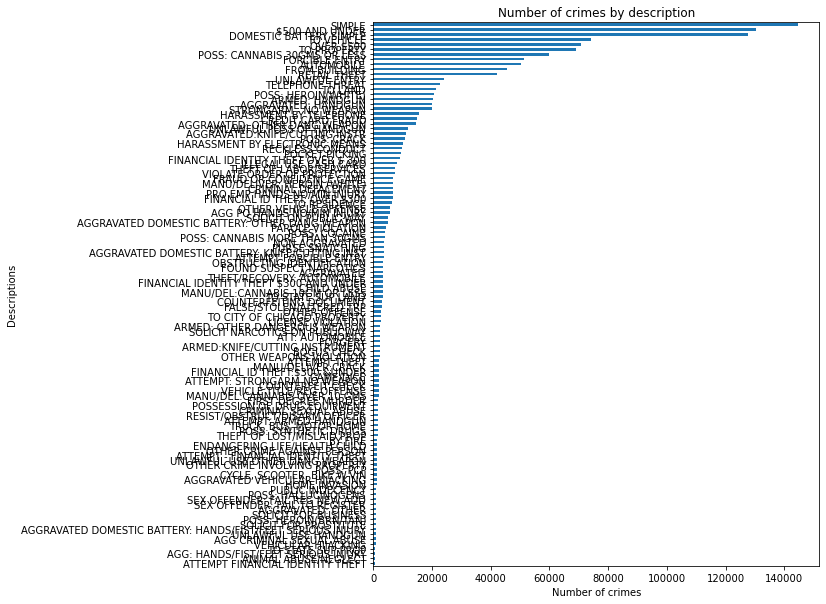

In [42]:
plt.figure(figsize=(8,10))
data.groupby([data['Description']]).size().sort_values(ascending=True)[-110:].plot(kind='barh')
plt.title('Number of crimes by description')
plt.ylabel('Descriptions')
plt.xlabel('Number of crimes')
plt.show()

We'll keep crimes with top 100 descriptions only

In [43]:
top100Desc = list(data.groupby([data['Description']]).size().sort_values(ascending=True)[-100:].index)

In [44]:
print('Current rows:', data.shape[0])
data = data[data['Description'].isin(top100Desc)]
print('Rows after removing description outliers:', data.shape[0])

Current rows: 1394275
Rows after removing description outliers: 1353699


In [45]:
data['Description'].value_counts()

SIMPLE                            144689
$500 AND UNDER                    130378
DOMESTIC BATTERY SIMPLE           127750
TO VEHICLE                         74115
OVER $500                          70775
                                   ...  
POSS: HALLUCINOGENS                  967
SEX OFFENDER: FAIL REG NEW ADD       946
SEX OFFENDER: FAIL TO REGISTER       904
AGGRAVATED: OTHER                    895
SOLICIT FOR BUSINESS                 882
Name: Description, Length: 100, dtype: int64

### Latitude and Longitude

In [46]:
import folium

In [47]:
map_osm = folium.Map(location=[41.881832, -87.623177], tiles='Stamen Toner')
samplePoints = data.sample(n = 100, random_state = 42)
for i,j in samplePoints.iterrows():
    folium.Marker(list((j['Latitude'],j['Longitude']))).add_to(map_osm)

In [48]:
map_osm

Displaying some sample points where crimes have happened

In [49]:
data.to_csv('data-clean.csv', index_label=False)
data.head()

Unnamed: 0        ID Case Number                Date  \
Date                                                                        
2016-05-03 23:40:00           3  10508693    HZ250496 2016-05-03 23:40:00   
2016-05-03 21:40:00          89  10508695    HZ250409 2016-05-03 21:40:00   
2016-05-03 23:31:00         197  10508697    HZ250503 2016-05-03 23:31:00   
2016-05-03 22:10:00         673  10508698    HZ250424 2016-05-03 22:10:00   
2016-05-03 22:00:00         911  10508699    HZ250455 2016-05-03 22:00:00   

                                   Block  IUCR            Primary Type  \
Date                                                                     
2016-05-03 23:40:00   013XX S SAWYER AVE  0486                 BATTERY   
2016-05-03 21:40:00   061XX S DREXEL AVE  0486                 BATTERY   
2016-05-03 23:31:00  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION   
2016-05-03 22:10:00    049XX W FULTON ST  0460                 BATTERY   
2016-05-03 22:00:00    003XX N LOTUS AVE  0820                   THEFT   

                                 Description Location Description  Arrest  \
Date                                                                        
2016-05-03 23:40:00  DOMESTIC BATTERY SIMPLE            APARTMENT    True   
2016-05-03 21:40:00  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
2016-05-03 23:31:00         RECKLESS CONDUCT               STREET   False   
2016-05-03 22:10:00                   SIMPLE             SIDEWALK   False   
2016-05-03 22:00:00           $500 AND UNDER            RESIDENCE   False   

                     ...  Y Coordinate  Year   Latitude  Longitude  Month  \
Date                 ...                                                    
2016-05-03 23:40:00  ...     1893681.0  2016  41.864073 -87.706819      5   
2016-05-03 21:40:00  ...     1864330.0  2016  41.782922 -87.604363      5   
2016-05-03 23:31:00  ...     1904819.0  2016  41.894908 -87.758372      5   
2016-05-03 22:10:00  ...     1901475.0  2016  41.885687 -87.749516      5   
2016-05-03 22:00:00  ...     1901675.0  2016  41.886297 -87.761751      5   

                    dayOfWeek  dayOfMonth  dayOfYear  weekOfMonth  weekOfYear  
Date                                                                           
2016-05-03 23:40:00         1           3        124            1          18  
2016-05-03 21:40:00         1           3        124            1          18  
2016-05-03 23:31:00         1           3        124            1          18  
2016-05-03 22:10:00         1           3        124            1          18  
2016-05-03 22:00:00         1           3        124            1          18  

[5 rows x 27 columns]

In [16]:
df = pd.read_csv (r'C:\Users\HP\Documents\BDA_Mini_Project\data-clean.csv')

In [51]:
df.head()

Unnamed: 0        ID Case Number                 Date  \
2016-05-03 23:40:00           3  10508693    HZ250496  2016-05-03 23:40:00   
2016-05-03 21:40:00          89  10508695    HZ250409  2016-05-03 21:40:00   
2016-05-03 23:31:00         197  10508697    HZ250503  2016-05-03 23:31:00   
2016-05-03 22:10:00         673  10508698    HZ250424  2016-05-03 22:10:00   
2016-05-03 22:00:00         911  10508699    HZ250455  2016-05-03 22:00:00   

                                   Block  IUCR            Primary Type  \
2016-05-03 23:40:00   013XX S SAWYER AVE  0486                 BATTERY   
2016-05-03 21:40:00   061XX S DREXEL AVE  0486                 BATTERY   
2016-05-03 23:31:00  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION   
2016-05-03 22:10:00    049XX W FULTON ST  0460                 BATTERY   
2016-05-03 22:00:00    003XX N LOTUS AVE  0820                   THEFT   

                                 Description Location Description  Arrest  \
2016-05-03 23:40:00  DOMESTIC BATTERY SIMPLE            APARTMENT    True   
2016-05-03 21:40:00  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
2016-05-03 23:31:00         RECKLESS CONDUCT               STREET   False   
2016-05-03 22:10:00                   SIMPLE             SIDEWALK   False   
2016-05-03 22:00:00           $500 AND UNDER            RESIDENCE   False   

                     ...  Y Coordinate  Year   Latitude  Longitude  Month  \
2016-05-03 23:40:00  ...     1893681.0  2016  41.864073 -87.706819      5   
2016-05-03 21:40:00  ...     1864330.0  2016  41.782922 -87.604363      5   
2016-05-03 23:31:00  ...     1904819.0  2016  41.894908 -87.758372      5   
2016-05-03 22:10:00  ...     1901475.0  2016  41.885687 -87.749516      5   
2016-05-03 22:00:00  ...     1901675.0  2016  41.886297 -87.761751      5   

                    dayOfWeek  dayOfMonth  dayOfYear  weekOfMonth  weekOfYear  
2016-05-03 23:40:00         1           3        124            1          18  
2016-05-03 21:40:00         1           3        124            1          18  
2016-05-03 23:31:00         1           3        124            1          18  
2016-05-03 22:10:00         1           3        124            1          18  
2016-05-03 22:00:00         1           3        124            1          18  

[5 rows x 27 columns]

In [52]:
df.shape

(1353699, 27)

In [17]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [18]:
df.head()

ID Case Number                 Date  \
2016-05-03 23:40:00  10508693    HZ250496  2016-05-03 23:40:00   
2016-05-03 21:40:00  10508695    HZ250409  2016-05-03 21:40:00   
2016-05-03 23:31:00  10508697    HZ250503  2016-05-03 23:31:00   
2016-05-03 22:10:00  10508698    HZ250424  2016-05-03 22:10:00   
2016-05-03 22:00:00  10508699    HZ250455  2016-05-03 22:00:00   

                                   Block  IUCR            Primary Type  \
2016-05-03 23:40:00   013XX S SAWYER AVE  0486                 BATTERY   
2016-05-03 21:40:00   061XX S DREXEL AVE  0486                 BATTERY   
2016-05-03 23:31:00  053XX W CHICAGO AVE  0470  PUBLIC PEACE VIOLATION   
2016-05-03 22:10:00    049XX W FULTON ST  0460                 BATTERY   
2016-05-03 22:00:00    003XX N LOTUS AVE  0820                   THEFT   

                                 Description Location Description  Arrest  \
2016-05-03 23:40:00  DOMESTIC BATTERY SIMPLE            APARTMENT    True   
2016-05-03 21:40:00  DOMESTIC BATTERY SIMPLE            RESIDENCE   False   
2016-05-03 23:31:00         RECKLESS CONDUCT               STREET   False   
2016-05-03 22:10:00                   SIMPLE             SIDEWALK   False   
2016-05-03 22:00:00           $500 AND UNDER            RESIDENCE   False   

                     Domestic  ...  Y Coordinate  Year   Latitude  Longitude  \
2016-05-03 23:40:00      True  ...     1893681.0  2016  41.864073 -87.706819   
2016-05-03 21:40:00      True  ...     1864330.0  2016  41.782922 -87.604363   
2016-05-03 23:31:00     False  ...     1904819.0  2016  41.894908 -87.758372   
2016-05-03 22:10:00     False  ...     1901475.0  2016  41.885687 -87.749516   
2016-05-03 22:00:00      True  ...     1901675.0  2016  41.886297 -87.761751   

                    Month  dayOfWeek  dayOfMonth  dayOfYear  weekOfMonth  \
2016-05-03 23:40:00     5          1           3        124            1   
2016-05-03 21:40:00     5          1           3        124            1   
2016-05-03 23:31:00     5          1           3        124            1   
2016-05-03 22:10:00     5          1           3        124            1   
2016-05-03 22:00:00     5          1           3        124            1   

                     weekOfYear  
2016-05-03 23:40:00          18  
2016-05-03 21:40:00          18  
2016-05-03 23:31:00          18  
2016-05-03 22:10:00          18  
2016-05-03 22:00:00          18  

[5 rows x 26 columns]

In [19]:
df.to_csv('data-clean-final.csv')

In [56]:
fields = df.columns
print(fields)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'Month', 'dayOfWeek',
       'dayOfMonth', 'dayOfYear', 'weekOfMonth', 'weekOfYear'],
      dtype='object')


In [57]:
print(5)

5


In [20]:
df.to_json(path_or_buf='my.json',orient='records')